In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/midterm/employee_departure_dataset.csv")

In [2]:
df.head()

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,2,1002334,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,3,1002335,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,4,1002336,1,~20miles,6,61K,63K,5.0,5.0,5,0


we can see that the columns Unnamed and RecordId are unnecessary so we can drop them 

In [3]:
df = df.drop(columns=['Unnamed: 0', 'RecordId'])

In [4]:
df.head()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,1,~20miles,6,61K,63K,5.0,5.0,5,0


# EDA

In [5]:
df.info

<bound method DataFrame.info of         Gender  Distance  YearsWorked PreviousSalary Salary  SelfReview  \
0            1  >30miles           10            63K    65K         4.0   
1            0  ~10miles            7            54K    56K         4.0   
2            0    <5mile            5            60K    61K         4.0   
3            0  ~15miles            4            59K    60K         5.0   
4            1  ~20miles            6            61K    63K         5.0   
...        ...       ...          ...            ...    ...         ...   
299995       0  >30miles            7            63K    64K         4.0   
299996       1  ~15miles            6            60K    62K         5.0   
299997       0  ~20miles            6            65K    66K         4.0   
299998       0    <5mile            4            54K    55K         5.0   
299999       0  ~20miles            6            61K    62K         5.0   

        SupervisorReview  DepartmentCode  Left  
0                 

In [7]:
df.dtypes

Gender                int64
Distance             object
YearsWorked           int64
PreviousSalary       object
Salary               object
SelfReview          float64
SupervisorReview    float64
DepartmentCode        int64
Left                  int64
dtype: object

we have three categorical variables which might need encoding later

### now lets look at the missing values

In [8]:
df.isnull().sum()

Gender                0
Distance            265
YearsWorked           0
PreviousSalary        0
Salary                0
SelfReview          584
SupervisorReview    576
DepartmentCode        0
Left                  0
dtype: int64

Looks like some of the columns need some imputation

### Let's look at the distribution of the numerical columns

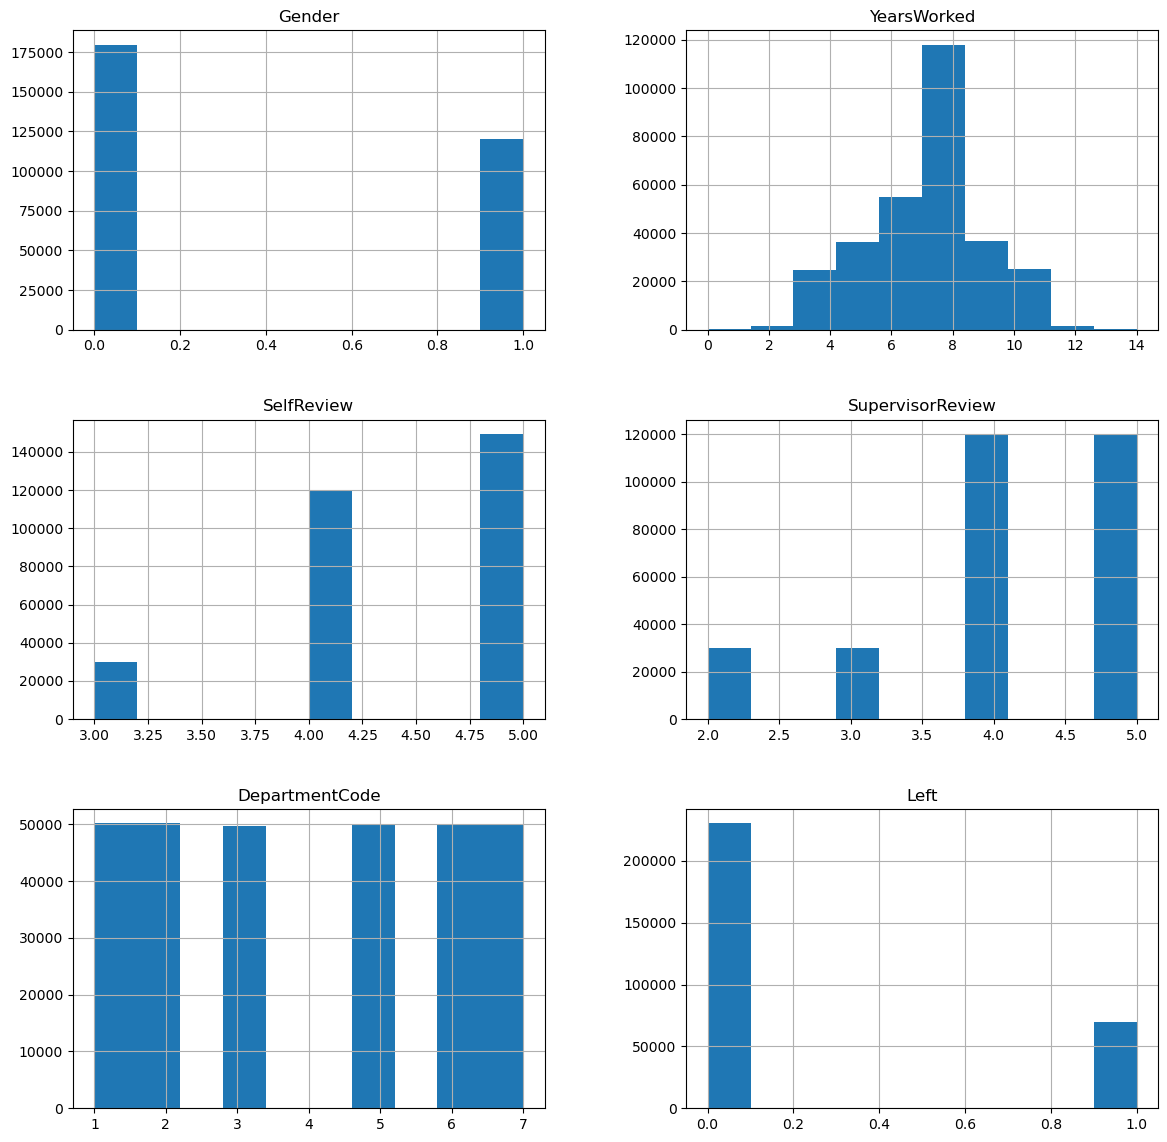

In [11]:
df.hist(figsize=(14,14))
plt.show()

As we can see some of the columns are not distributed normally and the target column's distribution makes it imbalanced which might need us to adjust the parameters accordingly

### Let's look at the categorical columns

In [12]:
df['Distance'].value_counts()

~10miles    90148
~15miles    89667
~20miles    59836
>30miles    30218
<5mile      29866
Name: Distance, dtype: int64

In [13]:
df['PreviousSalary'].value_counts()

60K    39790
59K    38557
61K    37276
58K    33261
62K    30679
57K    26071
63K    21774
56K    18927
64K    13922
55K    12367
54K     7532
65K     7147
53K     4291
66K     3056
52K     2221
51K     1024
67K     1006
50K      463
68K      253
49K      218
48K       75
69K       40
47K       34
46K        9
45K        6
70K        1
Name: PreviousSalary, dtype: int64

In [14]:
df['Salary'].value_counts()

61K    37943
62K    37051
63K    34922
60K    33943
59K    28141
64K    27940
58K    20849
65K    15813
66K    14486
57K    14348
56K     8965
67K     8282
55K     5378
68K     3985
54K     2884
69K     1592
53K     1440
52K      706
70K      580
50K      213
51K      209
71K      173
49K       71
48K       33
72K       33
47K        9
46K        6
73K        3
45K        1
74K        1
Name: Salary, dtype: int64

we are gonna change them to have better readability and convert the salries to int or float

In [15]:
distance_mapping = {
    '~10miles': 'Approx. 10 miles',
    '~15miles': 'Approx. 15 miles',
    '~20miles': 'Approx. 20 miles',
    '>30miles': 'More than 30 miles',
    '<5mile': 'Less than 5 miles'
}

# Apply the updated mapping to the Distance column
df['Distance'] = df['Distance'].map(distance_mapping)

In [16]:
df['Distance']

0         More than 30 miles
1           Approx. 10 miles
2          Less than 5 miles
3           Approx. 15 miles
4           Approx. 20 miles
                 ...        
299995    More than 30 miles
299996      Approx. 15 miles
299997      Approx. 20 miles
299998     Less than 5 miles
299999      Approx. 20 miles
Name: Distance, Length: 300000, dtype: object

In [17]:
df['PreviousSalary'] = df['PreviousSalary'].str.rstrip('K').astype(int) * 1000
df['Salary'] = df['Salary'].str.rstrip('K').astype(int) * 1000

In [18]:
df.head()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,1,More than 30 miles,10,63000,65000,4.0,5.0,2,0
1,0,Approx. 10 miles,7,54000,56000,4.0,4.0,2,0
2,0,Less than 5 miles,5,60000,61000,4.0,4.0,3,0
3,0,Approx. 15 miles,4,59000,60000,5.0,5.0,7,0
4,1,Approx. 20 miles,6,61000,63000,5.0,5.0,5,0


C:\Users\pavan sidhartha\AppData\Local\Temp\ipykernel_3808\328914496.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


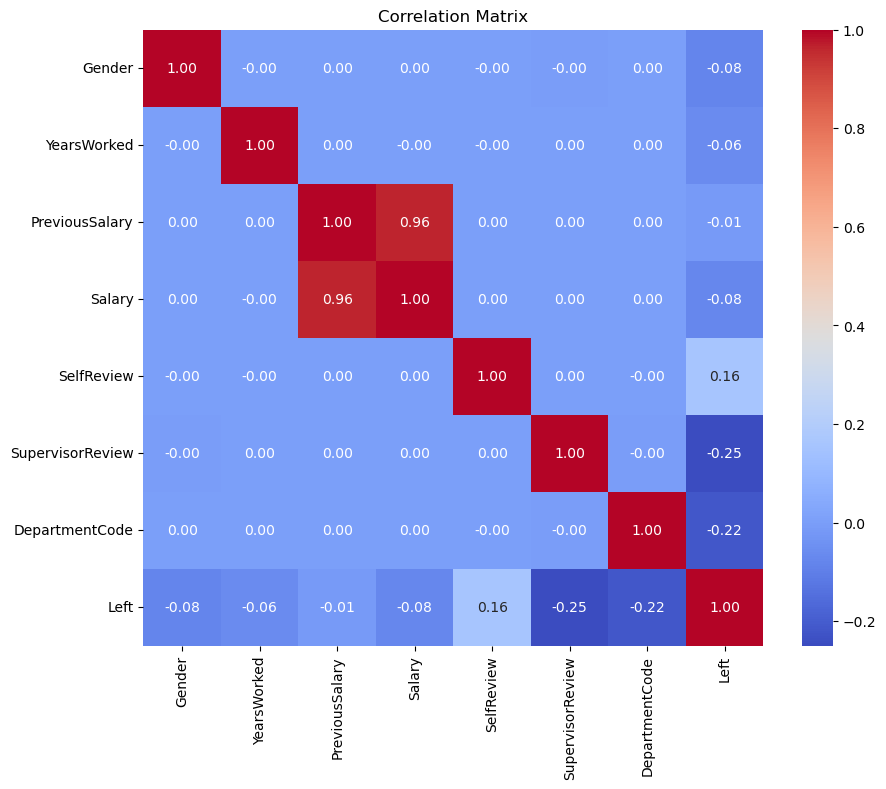

In [22]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

we only have one column whose correlation is really significant to the target variale which is not sufficient

# Create Train and Test Splits

In [25]:
X = df[['Gender', 'Distance', 'YearsWorked', 'PreviousSalary', 'Salary', 'SelfReview', 'SupervisorReview','DepartmentCode']]
y = df['Left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines

 * Let's use StandardScaler for scaling
 * Simple Imputer for handling missing values
 * One Hot Encodind for categorical data

In [36]:
numerical_features = [ 'YearsWorked', 'PreviousSalary', 'Salary']
categorical_features = ['Distance','Gender', 'SelfReview', 'SupervisorReview', 'DepartmentCode']

# Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [37]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['YearsWorked', 'PreviousSalary', 'Salary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Distance', 'Gender', 'SelfReview',
                                  'SupervisorReview', 'DepartmentCode'])])

# Model fitting

### Let's use three models
* Logistic Regression
* Desicion Tree classifier 
* Random Forest Classfier

### Logistic Regression

In [38]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression())])  # Logistic Regression as the model

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearsWorked',
                                                   'PreviousSalary',
                                                   'Salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Distance', 'Gender',
                                                   'SelfReview',
                                                   'SupervisorReview',
                                                   'DepartmentCode'])])),
                ('model', LogisticRegression())])

In [40]:
train_predictions = pipeline.predict(X_train)

# Predict on the testing data
test_predictions = pipeline.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8278791666666667
Testing Accuracy: 0.8288833333333333


it seems the data was a good fit as the test accuracy was greater than training accuracy

### Decision Tree Classifier

In [43]:
dt_model = DecisionTreeClassifier()

# Create a pipeline by combining preprocessing steps with Decision Tree Classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', dt_model)])  

In [44]:
pipeline.fit(X_train, y_train)

# Predict on the training and testing data
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9407416666666667
Testing Accuracy: 0.85495


the train accuracy here is a lot larger than logistic regression and also the test accuracy is greater than logistic regression but we might as well go and explore other models for better reults

### Random Forest Classifier

In [46]:
rf_model = RandomForestClassifier()

# Create a pipeline by combining preprocessing steps with Random Forest Classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rf_model)])  


In [47]:
pipeline.fit(X_train, y_train)

# Predict on the training and testing data
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9407416666666667
Testing Accuracy: 0.8543


Here we can see a possile overfitting in the model let's use grid search for finding the best model with best parameters

### Grid Search

In [59]:
# Define model and its parameter grid
model_lr = LogisticRegression()
param_grid_lr = {
    'model__C': [0.1, 1.0, 10.0]  # Adjust parameter grid as needed
}

# Create a pipeline by combining preprocessing steps with the model
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_lr)])

# Perform grid search
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and accuracy for Logistic Regression
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Accuracy for Logistic Regression:", grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'model__C': 10.0}
Best Accuracy for Logistic Regression: 0.8278874999999999


In [60]:
# Define model and its parameter grid
model_dt = DecisionTreeClassifier()
param_grid_dt = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}

# Create a pipeline by combining preprocessing steps with the model
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_dt)])

# Perform grid search
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and accuracy for Decision Tree
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}
Best Accuracy for Decision Tree: 0.86265


In [61]:
# Define model and its parameter grid
model_rf = RandomForestClassifier()
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline by combining preprocessing steps with the model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rf)])

# Perform grid search
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and accuracy for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Accuracy for Random Forest: 0.8520083333333334


The Decision Tree model attained the highest accuracy among the three,and it outperformed random forest as the dataset might have simpler relationships between features and target variable. Also, the accuracy difference between them is not significantly large, therefore decision tree is better than random forest computationally. 